##Importing Libraries

In [1]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.3 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
import time
from nltk.stem import PorterStemmer


In [4]:
import warnings
warnings.filterwarnings('ignore')

##IMPORTING DATASETS

In [5]:
df=pd.read_csv(r'/content/drive/MyDrive/PROJECTS DS/Sentimental Analysis/netflix_reviews.csv')

In [6]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9eea76a3-1b8b-4cb5-a5f3-48cf00f786e4,Faker toz,i rly wanted to watch my favourite show but it...,2,0,NaN,2024-06-05 22:09:02,NaN
1,e81f843a-a8c9-40af-8c0e-f084fde157db,Prince Kpahn,I love this app,5,0,8.85.0 build 9 50502,2024-06-05 22:08:47,8.85.0 build 9 50502
2,be1149b6-730b-4910-810d-04c65800a6a0,Isaiah anis,Great love to enjoy watching latest movies and...,5,0,8.20.0 build 12 40171,2024-06-05 22:07:47,8.20.0 build 12 40171
3,5210b102-ea01-4186-aac2-141647bda83c,Gamalyel Hernandez,Please add all the MY little pony Seasons whic...,4,0,8.117.0 build 3 50695,2024-06-05 22:07:35,8.117.0 build 3 50695
4,1effc685-c8de-412f-8029-a8f0d47b3547,Humle Junior,Nice app,5,0,NaN,2024-06-05 22:06:53,NaN


##Data Exploration and Cleaning

In [7]:
df.shape

(112271, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112271 entries, 0 to 112270
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              112271 non-null  object
 1   userName              112270 non-null  object
 2   content               112269 non-null  object
 3   score                 112271 non-null  int64 
 4   thumbsUpCount         112271 non-null  int64 
 5   reviewCreatedVersion  95990 non-null   object
 6   at                    112271 non-null  object
 7   appVersion            95990 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


In [9]:
df.isna().sum()

reviewId                    0
userName                    1
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16281
at                          0
appVersion              16281
dtype: int64

In [10]:
df.duplicated().sum()

287

In [11]:
df.describe()

,score,thumbsUpCount
count,112271.000000,112271.000000
mean,2.812383,10.516883
std,1.698993,100.719531
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


# Dataset Summary
This dataset contains information about the reviews given by netflix users on Google Play Store. Apart from the reviews, it also contains information about the ratings and the date of review as well as the likes on each of the review. There are total of 112271 reviews provided for the Netflix application.

##*Column Description*



*   LreviewId: represents a unique review id corresponding to each review
*   userName: provides information about the name of user who has given the review. There are total 79291 unique usernames which provided the review.


* content: it is the review provided by user

* score: it is the rating value provided along-side the review indicating the level of satisfaction. It has 5 categories
* thumbsUpCount: it is the total likes received by a particular review by other users


*  reviewCreatedVersion: it is version of review given by the user

##*Data Cleaning*
Issues with the dataset


*  reviewId, userName, reviewCreatedVersion & appVersion are irrelevant to the project, so dropping those.
*  There are 2 reviews missing from the dataset
* There are 287 duplicates in the dataset.
*There are 1 username missing.There are 16281 app & review version missing from the dataset. Both of them will be handled when those features are removed.
*only 25% reviews have 1 or more thumbs up on their review. It is very skewed.so dropping those as well
*year can be extracted for better analysis
*Instead of scores from 1 to 5, i am converting them to emotions to predict sentiments like
      Positive
      Neutral
      Negative







In [12]:
#Removing unwanted columns

In [13]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [14]:
df.drop(['reviewId', 'userName', 'thumbsUpCount',
       'reviewCreatedVersion', 'appVersion'],axis=1,inplace=True)

In [15]:
df.head()

,content,score,at
0,i rly wanted to watch my favourite show but it...,2,2024-06-05 22:09:02
1,I love this app,5,2024-06-05 22:08:47
2,Great love to enjoy watching latest movies and...,5,2024-06-05 22:07:47
3,Please add all the MY little pony Seasons whic...,4,2024-06-05 22:07:35
4,Nice app,5,2024-06-05 22:06:53


In [16]:
#removing null values

In [17]:
df.isna().sum()

content    2
score      0
at         0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

content    0
score      0
at         0
dtype: int64

In [20]:
#extracting the year to plot the relation between reviews and years

In [21]:
df['year']=pd.to_datetime(df['at']).apply(lambda x:x.year).astype(int)
df.drop('at',axis=1,inplace=True)
df.head()

,content,score,year
0,i rly wanted to watch my favourite show but it...,2,2024
1,I love this app,5,2024
2,Great love to enjoy watching latest movies and...,5,2024
3,Please add all the MY little pony Seasons whic...,4,2024
4,Nice app,5,2024


In [22]:
#renaming content and score to review and sentiment

In [23]:
df=df.rename(mapper={'content':'review','score':'sentiment'},axis=1)

In [24]:
df.head()

,review,sentiment,year
0,i rly wanted to watch my favourite show but it...,2,2024
1,I love this app,5,2024
2,Great love to enjoy watching latest movies and...,5,2024
3,Please add all the MY little pony Seasons whic...,4,2024
4,Nice app,5,2024


## Text Preprocessing

In [25]:
#emoji removal

In [26]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        "\U00002600-\U000026FF"  # miscellaneous symbols
        "\U00002B50-\U00002B59"  # stars
        "\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
        "\U00002500-\U00002BEF"  # Chinese symbols
        "\U0001F004"             # Mahjong tile red dragon
        "\U0001F0CF"             # Playing card black joker
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)


In [27]:
import contractions

In [28]:
ps=PorterStemmer()

In [29]:
def clean_text(text):
    # remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    # convert to lower case
    text = text.lower()
    # expand contractions
    text = contractions.fix(text)
    # remove punctuations
    text = ''.join([character for character in text if character not in string.punctuation])

    # remove stop words
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    # perform stemming
    text = text.split()
    words = []
    for word in text:
        words.append(ps.stem(word))
    text = ' '.join(words)
    # remove emoji
    text = remove_emojis(text)
    # remove extra spaces
    text = ' '.join(text.split())
    return text

In [30]:
start_time = time.time()
df['review'] = df['review'].apply(clean_text)
print(time.time()-start_time)

498.7916724681854


In [31]:
#adding a feature to the dataset to count the characters of the string to understand their relation

In [32]:
df['characters']=df['review'].apply(lambda x:len(''.join(x.split())))
df.head()

,review,sentiment,year,characters
0,realli want watch favourit show cost money ad ...,2,2024,42
1,love app,5,2024,7
2,great love enjoy watch latest movi download,5,2024,37
3,pleas add littl poni season season scene,4,2024,34
4,nice app,5,2024,7


In [33]:
#changing the sentiment column to show sentiments like positive(0),neutral(1) and negative(2).
#logic-
# 4 or 5 -Positive---0
#   3    -Neutral----1
#  <3    -Negative---2

In [34]:
def sentiment_class(score):
  if score>=4:
    return 0
  elif score==3:
    return 1
  else:
    return 2

In [35]:
df['sentiment']=df['sentiment'].apply(sentiment_class)

In [36]:
df.head()

,review,sentiment,year,characters
0,realli want watch favourit show cost money ad ...,2,2024,42
1,love app,0,2024,7
2,great love enjoy watch latest movi download,0,2024,37
3,pleas add littl poni season season scene,0,2024,34
4,nice app,0,2024,7


##Plotting some relations

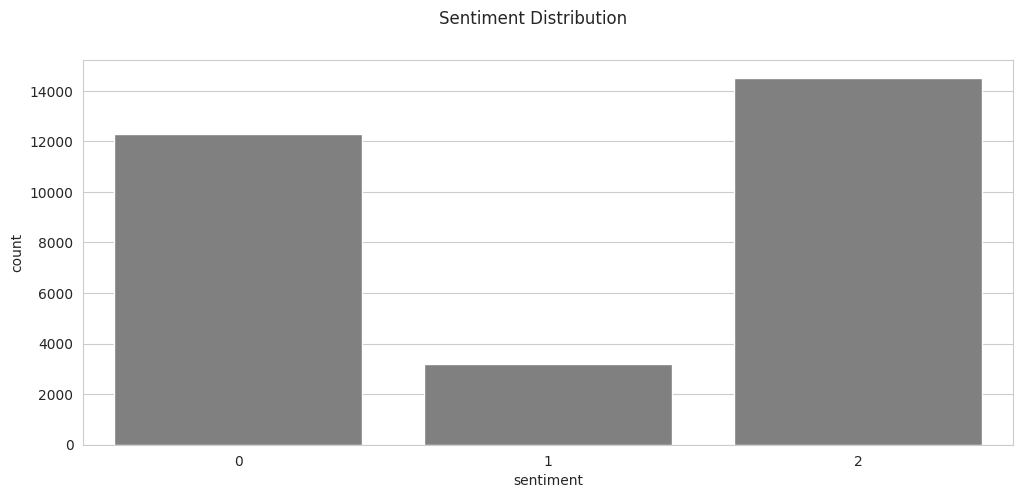

In [111]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='sentiment',color='grey')
plt.suptitle('Sentiment Distribution')
plt.show()

It can be seen that the sentiment is distributed almost evenly among positive and negative reviews.Neutral is unbalanced.Thus this dataset will be able to predict positive and negative reviews more accurately than neutral reviews.

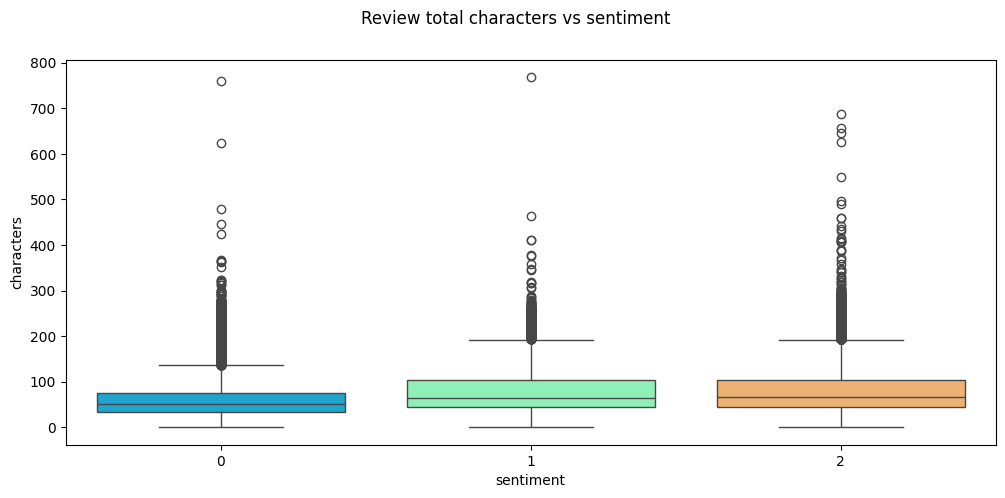

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='sentiment',y='characters',palette='rainbow')
plt.suptitle('Review total characters vs sentiment')
plt.show()

It can be seen that total characters of the review is between 0 and 200 for all the sentiments and there is a lot of outliers as well.so characters may not be the best fitted for classification

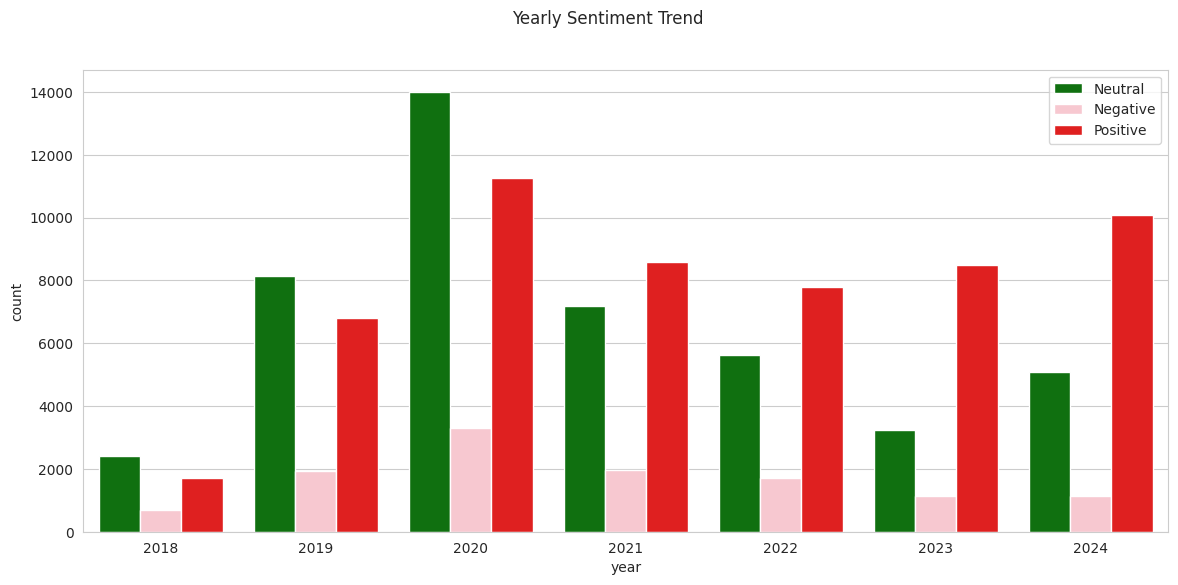

In [39]:

plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(data=df,x='year',hue='sentiment',palette={0:'green',1:'pink',2:'red'})
plt.suptitle('Yearly Sentiment Trend')
plt.legend(labels=['Neutral','Negative','Positive'])
plt.show()

## Chart Inference

From this graph it can be seen
 * from 2018 to 2020 the positive reviews was greater than negative reviews
 * From 2021 to 2024 the negative reviews are more than positive reviews.
 * An event may have happened in 2020 for this trend (further studies can be made on what happened)----may be because of the increase in users due to covid crisis


In [40]:
#Now we can drop characters as they are not really contributing to the sentiment and also as we are only analyzing
#the review at the end to predict sentiment lets drop the year as well.


In [41]:
df.drop(['characters','year'],axis=1,inplace=True)

In [42]:
df.head()

,review,sentiment
0,realli want watch favourit show cost money ad ...,2
1,love app,0
2,great love enjoy watch latest movi download,0
3,pleas add littl poni season season scene,0
4,nice app,0


## Splitting the Data

In [43]:
#reducing the sample size due to large time in processing the whole data for multiple models (can be applied to the whole data)
df=df.sample(30000)

In [44]:
X=df['review'].tolist()


In [45]:
y=df['sentiment']
y

68622     0
89410     0
75758     0
96445     0
12410     0
         ..
37956     2
29924     2
71423     1
103409    0
20721     2
Name: sentiment, Length: 30000, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##Vectorization

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)

In [48]:
X_train=vectorizer.fit_transform(X_train).toarray()


In [49]:
X_train.shape

(24000, 5000)

In [50]:
X_test=vectorizer.transform(X_test).toarray()

In [51]:
X_test.shape


(6000, 5000)

##Evaluating Classification Models

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [53]:
mnc = MultinomialNB()
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
xgbc = XGBClassifier(n_estimators=50, random_state=42)

In [54]:
classifiers = {
    'MultinomialNB': mnc,
    'KNN':knn,
    #'SVC':svc,
    'RandomForestClassifier':rfc,
    'XGBC':xgbc
}

In [55]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import cross_val_score

In [56]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred, average='weighted')
    kf_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    return str(score*100)+'%' , str(p_score*100)+'%', str(kf_score.mean()*100)+'%'

In [57]:
precision = []
accuracy = []
k_fold = []
start_time = time.time()

for model,classifier in classifiers.items():
    acc,prec,kf = train_model(classifier)
    accuracy.append(acc)
    precision.append(prec)
    k_fold.append(kf)
    finish_time = time.time()
    print(f"{model} has been successfully evaluated. Total time taken is: {(finish_time-start_time)} seconds")
    start_time = finish_time

MultinomialNB has been successfully evaluated. Total time taken is: 6.260618209838867 seconds
KNN has been successfully evaluated. Total time taken is: 248.35651993751526 seconds
RandomForestClassifier has been successfully evaluated. Total time taken is: 241.8549506664276 seconds
XGBC has been successfully evaluated. Total time taken is: 584.6613433361053 seconds


## Comparing Scores

In [58]:
score_comparison = pd.DataFrame({'Model': classifiers.keys(), 'Accuracy': accuracy, 'Precision': precision, 'K-Fold': k_fold})
score_comparison

,Model,Accuracy,Precision,K-Fold
0,MultinomialNB,76.75%,68.40368217223497%,76.77083333333331%
1,KNN,59.53333333333334%,63.16619494050395%,55.1875%
2,RandomForestClassifier,76.88333333333334%,68.53002666071816%,76.87916666666668%
3,XGBC,76.36666666666667%,73.18161129504355%,76.14166666666667%


In [104]:
xgb_pred=xgbc.predict(X_test)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2426
           1       0.43      0.02      0.04       655
           2       0.74      0.91      0.82      2919

    accuracy                           0.76      6000
   macro avg       0.66      0.57      0.55      6000
weighted avg       0.73      0.76      0.72      6000



##Prediction on new data

In [95]:
def predict_sentiment(review):
  review=[clean_text(review)]
  transformed_text=vectorizer.transform(review).toarray()
  prediction=xgbc.predict(transformed_text)
  if prediction==0:
    return 'Positive'
  elif prediction==1:
    return 'Neutral'
  else:
    return 'Negative'

In [100]:
prediction = predict_sentiment("It is very easy to work with and even the kids love it!")
print(prediction)

Positive
